In [100]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# import datetime class from datetime module

from datetime import datetime

In [101]:
# Load the Auto Quote Ins data

Teledata = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Telecom_Customer_Churn.csv", header=0)

# Copy the data to backup file

Teledata_BK = Teledata.copy()

# Display first 5 records

Teledata.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [102]:
# Display the Telecom dataset information

Teledata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [103]:
# Convert the target variable data type into interger

Teledata['Churn'] = Teledata['Churn'].str.replace('Yes', '1')
Teledata['Churn'] = Teledata['Churn'].str.replace('No', '0')
Teledata['Churn'] = Teledata['Churn'].astype(int)


In [104]:
#Display target variable "Churn"

Teledata['Churn'].value_counts(sort=False)

0    5174
1    1869
Name: Churn, dtype: int64

In [105]:
# Count the target or independent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

Churn_count = Teledata.Churn.value_counts()
print('Class 0:', Churn_count[0])
print('Class 1:', Churn_count[1])
print('Proportion:', round(Churn_count[0] / Churn_count[1], 2), ': 1')
print('Total Records:', len(Teledata))

Class 0: 5174
Class 1: 1869
Proportion: 2.77 : 1
Total Records: 7043


In [106]:
# Displaying Duplicate values with in Loan ataset, if avialble

Teledata_dup = Teledata[Teledata.duplicated(keep='last')]
Teledata_dup

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn


In [107]:
# Count the missing values by each variable, if available

Teledata.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [108]:
#Check the unique records counts

Teledata.nunique()

CustomerID          7043
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
Tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           4
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
Churn                  2
dtype: int64

In [109]:
# Dropping the variables which are not impacting the target variable

Teledata = Teledata.drop(['CustomerID', 'OnlineSecurity', 'OnlineBackup'], axis=1)

In [110]:
# Display the Telecom dataset information

Teledata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   TechSupport       7043 non-null   object 
 9   StreamingTV       7043 non-null   object 
 10  StreamingMovies   7043 non-null   object 
 11  Contract          7043 non-null   object 
 12  PaperlessBilling  7043 non-null   object 
 13  PaymentMethod     7043 non-null   object 
 14  MonthlyCharges    7043 non-null   float64
 15  Churn             7043 non-null   int32  
dtypes: float64(1), int32(1), int64(2), object(

In [111]:
# Use LabelEncoder for converting Object Variable datatype to integer variable datatype

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Teledata['Gender'] = LE.fit_transform(Teledata['Gender'])
Teledata['Partner'] = LE.fit_transform(Teledata['Partner'])
Teledata['Dependents'] = LE.fit_transform(Teledata['Dependents'])
Teledata['SeniorCitizen'] = LE.fit_transform(Teledata['SeniorCitizen'])
Teledata['PhoneService'] = LE.fit_transform(Teledata['PhoneService'])
Teledata['PaperlessBilling'] = LE.fit_transform(Teledata['PaperlessBilling'])
Teledata['PaymentMethod'] = LE.fit_transform(Teledata['PaymentMethod'])

In [112]:
# Display 'MultipleLines' variable 
Teledata['MultipleLines'].value_counts(sort=False)

No phone service     682
No                  3390
Yes                 2971
Name: MultipleLines, dtype: int64

In [113]:
# Convert the MultipleLines variable data type into interger
Teledata['MultipleLines'] = Teledata['MultipleLines'].str.replace('Yes', '2')
Teledata['MultipleLines'] = Teledata['MultipleLines'].str.replace('No phone service', '1')
Teledata['MultipleLines'] = Teledata['MultipleLines'].str.replace('No', '0')
Teledata['MultipleLines'] = Teledata['MultipleLines'].astype(int)

In [114]:
# Display 'InternetService' variable 
Teledata['InternetService'].value_counts(sort=False)

DSL            2421
Fiber optic    3096
No             1526
Name: InternetService, dtype: int64

In [115]:
# Convert the InternetService variable data type into interger
Teledata['InternetService'] = Teledata['InternetService'].str.replace('DSL', '2')
Teledata['InternetService'] = Teledata['InternetService'].str.replace('Fiber optic', '1')
Teledata['InternetService'] = Teledata['InternetService'].str.replace('No', '0')
Teledata['InternetService'] = Teledata['InternetService'].astype(int)

In [116]:
# Display 'TechSupport' variable 
Teledata['TechSupport'].value_counts(sort=False)

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [117]:
# Convert the TechSupport variable data type into interger
Teledata['TechSupport'] = Teledata['TechSupport'].str.replace('Yes', '2')
Teledata['TechSupport'] = Teledata['TechSupport'].str.replace('No internet service', '1')
Teledata['TechSupport'] = Teledata['TechSupport'].str.replace('No', '0')
Teledata['TechSupport'] = Teledata['TechSupport'].astype(int)

In [118]:
# Display 'StreamingTV' variable 
Teledata['StreamingTV'].value_counts(sort=False)

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [119]:
# Convert the StreamingTV variable data type into interger
Teledata['StreamingTV'] = Teledata['StreamingTV'].str.replace('Yes', '2')
Teledata['StreamingTV'] = Teledata['StreamingTV'].str.replace('No internet service', '1')
Teledata['StreamingTV'] = Teledata['StreamingTV'].str.replace('No', '0')
Teledata['StreamingTV'] = Teledata['StreamingTV'].astype(int)

In [120]:
# Display 'StreamingMovies' variable 
Teledata['StreamingMovies'].value_counts(sort=False)

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [121]:
# Convert the StreamingMovies variable data type into interger
Teledata['StreamingMovies'] = Teledata['StreamingMovies'].str.replace('Yes', '2')
Teledata['StreamingMovies'] = Teledata['StreamingMovies'].str.replace('No internet service', '1')
Teledata['StreamingMovies'] = Teledata['StreamingMovies'].str.replace('No', '0')
Teledata['StreamingMovies'] = Teledata['StreamingMovies'].astype(int)

In [122]:
# Display 'Contract' variable 
Teledata['Contract'].value_counts(sort=False)

Month-to-month    3875
One year          1473
Two year          1695
Name: Contract, dtype: int64

In [123]:
# Convert the StreamingMovies variable data type into interger
Teledata['Contract'] = Teledata['Contract'].str.replace('Month-to-month', '2')
Teledata['Contract'] = Teledata['Contract'].str.replace('One year', '1')
Teledata['Contract'] = Teledata['Contract'].str.replace('Two year', '0')
Teledata['Contract'] = Teledata['Contract'].astype(int)

In [124]:
# Display the Telecom dataset information
Teledata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   TechSupport       7043 non-null   int32  
 9   StreamingTV       7043 non-null   int32  
 10  StreamingMovies   7043 non-null   int32  
 11  Contract          7043 non-null   int32  
 12  PaperlessBilling  7043 non-null   int32  
 13  PaymentMethod     7043 non-null   int32  
 14  MonthlyCharges    7043 non-null   float64
 15  Churn             7043 non-null   int32  
dtypes: float64(1), int32(13), int64(2)
memory 

In [125]:
# Identify the independent and Target variables

IndepVar = []
for col in Teledata.columns:
    if col != 'Churn':
        IndepVar.append(col)

TargetVar = 'Churn'

x = Teledata[IndepVar]
y = Teledata[TargetVar]

In [126]:
# split into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42, stratify=y)

# Copy the test data to back-up file

x_test_F1 = x_test.copy()

In [127]:
# Scaling the features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [128]:
# Load the result dataset

TeleResults = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Hyper Parameter tuning\HTResults.csv", header=0)
TeleResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Bagging Classifier Algorithm

Confusion matrix : 
 [[ 222  245]
 [ 138 1156]]
Outcome values : 
 222 245 138 1156
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.48      0.54       467
           0       0.83      0.89      0.86      1294

    accuracy                           0.78      1761
   macro avg       0.72      0.68      0.70      1761
weighted avg       0.77      0.78      0.77      1761

Accuracy : 78.3 %
Precision : 61.7 %
Recall : 47.5 %
F1 Score : 0.537
Specificity or True Negative Rate : 89.3 %
Balanced Accuracy : 68.4 %
MCC : 0.404
roc_auc_score: 0.684


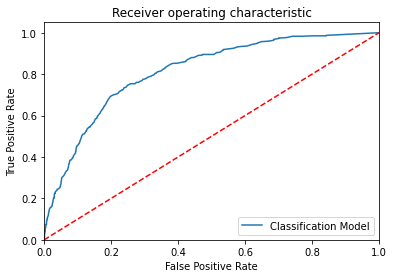

-----------------------------------------------------------------------------------------------------


In [139]:
# Training bagging classifier - BaggingClassifier class of 'sklearn.ensemble' packages to build bagging classifier model. 
# We set DecisionTreeClassifier class as a base estimator and set 100 to the number of estimators, then train the model 
# with train data.  

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                                 random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                                 class_weight=None, ccp_alpha=0.0)

modelBAG = BaggingClassifier(base_estimator=modelDT, n_estimators=200, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

# Fit the model with train data

modelBAG.fit(x_train,y_train)

# Predict the model with test data set

y_pred = modelBAG.predict(x_test)
y_pred_prob = modelBAG.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,modelBAG.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#-------------------------------------------------------------------------------------
new_row = {'Model Name' : modelBAG,
           'True Positive' : tp,
           'False Negative' : fn,
           'False Positive' : fp,
           'True Negative' : tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
TeleResults = TeleResults.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------

In [140]:
TeleResults

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,False_Negative,False_Postive,True_Negative,True_Positive,False Postive
0,(DecisionTreeClassifier(random_state=211147909...,NaN,NaN,NaN,NaN,0.777,0.606,0.458,0.522,0.893,0.387,0.675413,0.676,NaN,NaN,NaN,NaN,NaN
1,(DecisionTreeClassifier(random_state=591411150...,NaN,NaN,NaN,NaN,0.774,0.596,0.46,0.519,0.887,0.38,0.673779,0.674,252.0,146.0,1148.0,215.0,NaN
2,(DecisionTreeClassifier(random_state=170853563...,230,237,NaN,1154,0.786,0.622,0.493,0.55,0.892,0.416,0.692157,0.692,NaN,NaN,NaN,NaN,140.0
3,(DecisionTreeClassifier(random_state=161809015...,223,244,NaN,1149,0.779,0.606,0.478,0.534,0.888,0.397,0.68273,0.683,NaN,NaN,NaN,NaN,145.0
4,(DecisionTreeClassifier(random_state=184134779...,222,245,138,1156,0.783,0.617,0.475,0.537,0.893,0.404,0.684364,0.684,NaN,NaN,NaN,NaN,NaN


# Bagging Classifier with other classification models as base model

In [142]:
# Checking accuracy by changing base estimator - 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as lgb

from sklearn.ensemble import BaggingClassifier

modelLR = LogisticRegression()
modelRF = RandomForestClassifier(criterion='gini', n_estimators=500, random_state=0)
modelDT = DecisionTreeClassifier(criterion="entropy")
modelKNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30,
                                p=2, metric='minkowski', metric_params=None, n_jobs=None)

modelXGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100,
                                      subsample=1.0, criterion='friedman_mse', min_samples_split=2,
                                      min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                      min_impurity_decrease=0.0, init=None,
                                      random_state=None, max_features=None, verbose=0, max_leaf_nodes=None,
                                      warm_start=False, validation_fraction=0.1, n_iter_no_change=None,
                                      tol=0.0001, ccp_alpha=0.0)
modelET = ExtraTreesClassifier()
modelLGB = lgb.LGBMClassifier()


base_methods=[None, modelLR, modelRF, modelDT, modelKNN, modelXGB, modelET, modelLGB]
for bm in base_methods:
    print("Method: ", bm)
    modelBAG = BaggingClassifier(base_estimator=bm,n_estimators=100,bootstrap=True)
    
    # fit the model with train data
    
    modelBAG.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = modelBAG.predict(x_test)
    
    # Evaluate the model performance by metrics
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    matrix = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n',matrix)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3)
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    print('-----------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------
    new_row = {'Model Name' : bm,
               'True Positive' : tp,
               'False Negative' : fn,
               'False Postive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    TeleResults = TeleResults.append(new_row, ignore_index=True)
    #-----------------------------------------------------------------------------

Method:  None
Confusion matrix : 
 [[ 218  249]
 [ 142 1152]]
Outcome values : 
 218 249 142 1152
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.47      0.53       467
           0       0.82      0.89      0.85      1294

    accuracy                           0.78      1761
   macro avg       0.71      0.68      0.69      1761
weighted avg       0.76      0.78      0.77      1761

Accuracy : 77.8 %
Precision : 60.6 %
Recall : 46.7 %
F1 Score : 0.527
Balanced Accuracy : 67.8 %
MCC : 0.391
roc_auc_score: 0.679
-----------------------------------------------------------------------
Method:  LogisticRegression()
Confusion matrix : 
 [[ 243  224]
 [ 133 1161]]
Outcome values : 
 243 224 133 1161
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.52      0.58       467
           0       0.84      0.90      0.87      1294

    accuracy                           0.80

In [99]:
# Results with comparing the all the algorithms 
TeleResults.head(10)

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,(DecisionTreeClassifier(random_state=167017630...,0.78,0.631,0.457,0.53,0.9,0.4,0.678679,0.678
1,NaN,0.78,0.629,0.463,0.534,0.898,0.402,0.680641,0.68
2,LogisticRegression(),0.813,0.701,0.543,0.612,0.913,0.498,0.728107,0.728
3,"RandomForestClassifier(n_estimators=500, rando...",0.795,0.673,0.48,0.56,0.913,0.442,0.696402,0.696
4,DecisionTreeClassifier(criterion='entropy'),0.776,0.619,0.457,0.526,0.895,0.391,0.675949,0.676
5,KNeighborsClassifier(),0.768,0.588,0.489,0.534,0.872,0.384,0.680296,0.68
6,GradientBoostingClassifier(loss='deviance'),0.805,0.692,0.511,0.588,0.915,0.474,0.713229,0.713
